In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "Sonar.csv"
dataset = pd.read_csv(file)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,0
1,0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,...,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,1
2,0.0036,0.0078,0.0092,0.0387,0.0530,0.1197,0.1243,0.1026,0.1239,0.0888,...,0.0119,0.0055,0.0035,0.0036,0.0004,0.0018,0.0049,0.0024,0.0016,1
3,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,1
4,0.0047,0.0059,0.0080,0.0554,0.0883,0.1278,0.1674,0.1373,0.2922,0.3469,...,0.0095,0.0126,0.0069,0.0039,0.0068,0.0060,0.0045,0.0002,0.0029,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print("X=",X[:2])
print("y=",y[:2])

X= [[0.0015 0.0186 0.0289 0.0195 0.0515 0.0817 0.1005 0.0124 0.1168 0.1476
  0.2118 0.2575 0.2354 0.1334 0.0092 0.1951 0.3685 0.4646 0.5418 0.626
  0.742  0.8257 0.8609 0.84   0.8949 0.9945 1.     0.9649 0.8747 0.6257
  0.2184 0.2945 0.3645 0.5012 0.7843 0.9361 0.8195 0.6207 0.4513 0.3004
  0.2674 0.2241 0.3141 0.3693 0.2986 0.2226 0.0849 0.0359 0.0289 0.0122
  0.0045 0.0108 0.0075 0.0089 0.0036 0.0029 0.0013 0.001  0.0032 0.0047]
 [0.0025 0.0309 0.0171 0.0228 0.0434 0.1224 0.1947 0.1661 0.1368 0.143
  0.0994 0.225  0.2444 0.3239 0.3039 0.241  0.0367 0.1672 0.3038 0.4069
  0.3613 0.1994 0.4611 0.6849 0.7272 0.7152 0.7102 0.8516 1.     0.769
  0.4841 0.3717 0.6096 0.511  0.2586 0.0916 0.0947 0.2287 0.348  0.2095
  0.1901 0.2941 0.2211 0.1524 0.0746 0.0606 0.0692 0.0446 0.0344 0.0082
  0.0108 0.0149 0.0077 0.0036 0.0114 0.0085 0.0101 0.0016 0.0028 0.0014]]
y= [0 1]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [6]:
from sklearn.neural_network import MLPClassifier
classifer = MLPClassifier(hidden_layer_sizes=100,
                          activation="relu",
                          solver='sgd',
                          random_state=0,
                          verbose=True)

a = classifer.fit(X_train,y_train)

Iteration 1, loss = 0.73882614
Iteration 2, loss = 0.73839648
Iteration 3, loss = 0.73779094
Iteration 4, loss = 0.73703347
Iteration 5, loss = 0.73614786
Iteration 6, loss = 0.73515687
Iteration 7, loss = 0.73408079
Iteration 8, loss = 0.73293579
Iteration 9, loss = 0.73173938
Iteration 10, loss = 0.73050447
Iteration 11, loss = 0.72924545
Iteration 12, loss = 0.72797482
Iteration 13, loss = 0.72669949
Iteration 14, loss = 0.72542911
Iteration 15, loss = 0.72417297
Iteration 16, loss = 0.72293777
Iteration 17, loss = 0.72172710
Iteration 18, loss = 0.72054606
Iteration 19, loss = 0.71939692
Iteration 20, loss = 0.71828745
Iteration 21, loss = 0.71721748
Iteration 22, loss = 0.71618849
Iteration 23, loss = 0.71520362
Iteration 24, loss = 0.71426062
Iteration 25, loss = 0.71335835
Iteration 26, loss = 0.71249684
Iteration 27, loss = 0.71167566
Iteration 28, loss = 0.71089178
Iteration 29, loss = 0.71014458
Iteration 30, loss = 0.70943360
Iteration 31, loss = 0.70875809
Iteration 32, los

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


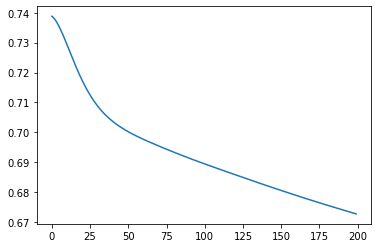

In [7]:
plt.plot(a.loss_curve_)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_train = confusion_matrix(y_train, classifer.predict(X_train))
print(cm_train)
print(accuracy_score(y_train, classifer.predict(X_train))*100)

[[73 11]
 [45 37]]
66.26506024096386


<AxesSubplot:>

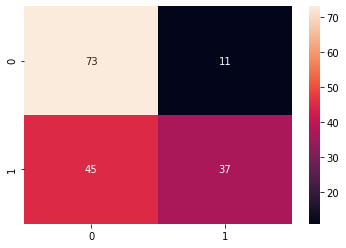

In [10]:
sns.heatmap(cm_train,annot=True)

In [12]:
y_pred = classifer.predict(X_test)
comparison = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1), 
                                          y_pred.reshape(len(y_pred),1)),
                                          1), 
                          columns=["Actual","Predicted"])
comparison[:10]

,Actual,Predicted
0,1,0
1,1,0
2,0,0
3,0,0
4,0,1
5,0,0
6,1,0
7,0,0
8,0,0
9,1,0


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm_test)
print("Test accuracy: ", accuracy_score(y_test, y_pred)*100,"%")

Confusion Matrix: 
 [[25  2]
 [12  3]]
Test accuracy:  66.66666666666666 %


<AxesSubplot:>

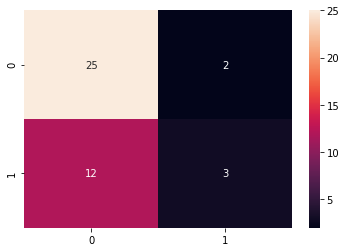

In [14]:
sns.heatmap(cm_test, annot=True) 


In [15]:
from sklearn.metrics import classification_report
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.68      0.78        37
           1       0.20      0.60      0.30         5

    accuracy                           0.67        42
   macro avg       0.56      0.64      0.54        42
weighted avg       0.84      0.67      0.72        42



Regressor

In [18]:
file_1 = "hourly_wages_data.csv"
dataset1 = pd.read_csv(file_1)
dataset1.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [19]:
dataset1.isnull().sum()

wage_per_hour     0
union             0
education_yrs     0
experience_yrs    0
age               0
female            0
marr              0
south             0
manufacturing     0
construction      0
dtype: int64

In [20]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wage_per_hour   534 non-null    float64
 1   union           534 non-null    int64  
 2   education_yrs   534 non-null    int64  
 3   experience_yrs  534 non-null    int64  
 4   age             534 non-null    int64  
 5   female          534 non-null    int64  
 6   marr            534 non-null    int64  
 7   south           534 non-null    int64  
 8   manufacturing   534 non-null    int64  
 9   construction    534 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [21]:
y = dataset1["wage_per_hour"].values
X = dataset1.drop(["wage_per_hour"], axis =1).values

In [22]:
print("union",dataset1["union"].unique())
print("female",dataset1["female"].unique())
print("marr",dataset1["marr"].unique())
print("south",dataset1["south"].unique())
print("manufacturing",dataset1["manufacturing"].unique())
print("construction",dataset1["construction"].unique())

union [0 1]
female [1 0]
marr [1 0]
south [0 1]
manufacturing [1 0]
construction [0 1]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,1:4] = sc.fit_transform(X_train[:,1:4])
X_test[:,1:4] = sc.fit_transform(X_test[:,1:4])

In [26]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100), 
                           max_iter=300,
                           activation = 'relu',
                           solver='sgd',
                           random_state=0,
                           verbose=True)
a = regressor.fit(X_train,y_train)

Iteration 1, loss = 53.74924318
Iteration 2, loss = 50.19567952
Iteration 3, loss = 44.75668409
Iteration 4, loss = 38.09325520
Iteration 5, loss = 30.81207415
Iteration 6, loss = 23.77036902
Iteration 7, loss = 18.18145571
Iteration 8, loss = 15.07271821
Iteration 9, loss = 14.09022972
Iteration 10, loss = 14.50566879
Iteration 11, loss = 14.76805155
Iteration 12, loss = 14.47211385
Iteration 13, loss = 13.77716252
Iteration 14, loss = 13.14333192
Iteration 15, loss = 12.71570347
Iteration 16, loss = 12.52104429
Iteration 17, loss = 12.36128132
Iteration 18, loss = 12.22840649
Iteration 19, loss = 12.08781332
Iteration 20, loss = 11.95805657
Iteration 21, loss = 11.83431534
Iteration 22, loss = 11.72642440
Iteration 23, loss = 11.63260113
Iteration 24, loss = 11.54446977
Iteration 25, loss = 11.46380801
Iteration 26, loss = 11.40454095
Iteration 27, loss = 11.33942335
Iteration 28, loss = 11.28392017
Iteration 29, loss = 11.23662965
Iteration 30, loss = 11.19425303
Iteration 31, loss 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
print("Train Accuracy",regressor.score(X_train, y_train)*100,"%")

Train Accuracy 29.054311084957007 %


In [28]:
print("Test Accuracy",regressor.score(X_test,y_test)*100,"%")

Test Accuracy 21.78123920364713 %
